In [1]:
!pip install pyodbc

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import pyodbc # Biblioteca para fazer a ligação ao banco de dados SQL Server
warnings.filterwarnings("ignore")


**Fazendo a conexao com o banco de dados no SQL Server
===

In [159]:
#Fazendo a conexao com o banco de dados no SQL Server
conexao = (
    'Driver={SQL Server};'
    'Server= localhost;'
    'Database = SISTEMA_BANCO;')

print('Conexão bem sucedida!')

Conexão bem sucedida!


In [160]:
#Conectando ao banco de dados com o login e senha
conectar = pyodbc.connect(driver='{SQL Server}', host='localhost', database='SISTEMA_BANCO'
                      )
print('Conexão bem sucedida!')

Conexão bem sucedida!


In [161]:
# Buscando tabela dentro do banco de dados
df = pd.read_sql_query('select * from CONTRATOS_FINANCIAMENTOS', conectar)

**Começando Analise exploratória dos dados
---

In [162]:
df_Backup = df.copy() # Fazendo um backup da tabela (por segurança)

In [163]:
df.shape

(10415, 20)

In [164]:
df.head()

,NUMERO_CONTRATO,DATA_ASSINATURA_CONTRATO,TIPO_FINANCIAMENTO,TAXA_AO_ANO,PZ_FINANCIAMENTO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_FINANCIAMENTO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,INADIMPLENTE_COBRANCA
0,41637,2012-03-23,IMOBILIARIO,15.0,180,FORTALEZA,CE,4800.0,0,0,97,120078.00,72,3,506,152,73767.0,471.29,70.0,SIM
1,67958,2012-01-24,IMOBILIARIO,15.0,200,SAO PAULO,SP,6800.0,0,0,103,156759.47,42,1,349,93,323251.0,1858.69,28.0,SIM
2,68502,2014-05-23,IMOBILIARIO,18.0,200,SAO PAULO,SP,6800.0,0,0,98,277125.05,83,1,151,39,529419.0,3123.57,60.0,SIM
3,68731,2015-10-23,IMOBILIARIO,15.0,200,SAO PAULO,SP,6800.0,0,0,87,351395.19,66,1,3797,206,499753.0,2873.58,41.0,SIM
4,68996,2017-01-24,IMOBILIARIO,17.0,200,SAO PAULO,SP,6800.0,0,0,71,344249.83,57,1,36,10,722057.0,4224.03,63.0,SIM


In [165]:
#Há 5 valores nulos no Dataframe , irei remover posteriormente
df.isnull().sum()

NUMERO_CONTRATO                   0
DATA_ASSINATURA_CONTRATO          0
TIPO_FINANCIAMENTO                0
TAXA_AO_ANO                       0
PZ_FINANCIAMENTO                  0
CIDADE_CLIENTE                    0
ESTADO_CLIENTE                    0
RENDA_MENSAL_CLIENTE              0
QT_PC_ATRASO                      0
QT_DIAS_PRIM_PC_ATRASO            0
QT_TOTAL_PC_PAGAS                 0
VL_TOTAL_PC_PAGAS                 4
QT_PC_PAGA_EM_DIA                 0
QT_DIAS_MIN_ATRASO                0
QT_DIAS_MAX_ATRASO                0
QT_DIAS_MEDIA_ATRASO              0
VALOR_FINANCIAMENTO               0
VALOR_PARCELA                     0
IDADE_DATA_ASSINATURA_CONTRATO    1
INADIMPLENTE_COBRANCA             0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NUMERO_CONTRATO                 10415 non-null  int64  
 1   DATA_ASSINATURA_CONTRATO        10415 non-null  object 
 2   TIPO_FINANCIAMENTO              10415 non-null  object 
 3   TAXA_AO_ANO                     10415 non-null  float64
 4   PZ_FINANCIAMENTO                10415 non-null  int64  
 5   CIDADE_CLIENTE                  10415 non-null  object 
 6   ESTADO_CLIENTE                  10415 non-null  object 
 7   RENDA_MENSAL_CLIENTE            10415 non-null  float64
 8   QT_PC_ATRASO                    10415 non-null  int64  
 9   QT_DIAS_PRIM_PC_ATRASO          10415 non-null  int64  
 10  QT_TOTAL_PC_PAGAS               10415 non-null  int64  
 11  VL_TOTAL_PC_PAGAS               10411 non-null  float64
 12  QT_PC_PAGA_EM_DIA               

In [167]:
#Verificando Quais as datas que estou lidando dentro do dataframe
inicio = pd.to_datetime(df['DATA_ASSINATURA_CONTRATO']).dt.date.min()
final = pd.to_datetime(df['DATA_ASSINATURA_CONTRATO']).dt.date.max()
print('Data inicial:', inicio , 'Data final:', final)

Data inicial: 2012-01-10 Data final: 2022-11-14


In [168]:
df.nunique()

NUMERO_CONTRATO                   10415
DATA_ASSINATURA_CONTRATO           1070
TIPO_FINANCIAMENTO                    1
TAXA_AO_ANO                         111
PZ_FINANCIAMENTO                      9
CIDADE_CLIENTE                      525
ESTADO_CLIENTE                       27
RENDA_MENSAL_CLIENTE                  7
QT_PC_ATRASO                        130
QT_DIAS_PRIM_PC_ATRASO              227
QT_TOTAL_PC_PAGAS                   137
VL_TOTAL_PC_PAGAS                  9860
QT_PC_PAGA_EM_DIA                   129
QT_DIAS_MIN_ATRASO                  122
QT_DIAS_MAX_ATRASO                  534
QT_DIAS_MEDIA_ATRASO                323
VALOR_FINANCIAMENTO                 834
VALOR_PARCELA                      1826
IDADE_DATA_ASSINATURA_CONTRATO       78
INADIMPLENTE_COBRANCA                 2
dtype: int64

In [169]:
df.describe() #Analise estatistica das colunas

,NUMERO_CONTRATO,TAXA_AO_ANO,PZ_FINANCIAMENTO,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_FINANCIAMENTO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO
count,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10411.000000,10415.000000,10415.000000,10415.000000,10415.000000,1.041500e+04,10415.000000,10414.000000
mean,95569.356889,17.271483,114.242535,5620.259241,16.716179,664.389438,35.946711,44528.545631,27.667115,6.115699,79.133845,28.841863,3.255909e+05,3617.341097,40.789418
std,34561.658949,2.566596,64.330109,2930.301113,30.706681,1181.352716,28.384415,65640.970502,25.153443,82.908021,334.871089,137.395374,1.774775e+05,1932.714754,12.390906
min,32709.000000,7.000000,48.000000,1800.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,2.932700e+04,185.740000,0.000000
25%,75868.500000,16.000000,72.000000,1800.000000,0.000000,0.000000,11.000000,8675.445000,7.000000,0.000000,0.000000,0.000000,2.100000e+05,2467.755000,31.250000
50%,79111.000000,17.000000,72.000000,7800.000000,0.000000,0.000000,33.000000,24345.600000,22.000000,1.000000,8.000000,4.000000,2.800000e+05,3470.590000,39.000000
75%,136637.500000,19.000000,180.000000,7800.000000,22.000000,1005.500000,54.000000,46787.290000,42.000000,3.000000,62.000000,22.000000,3.929738e+05,4930.245000,49.000000
max,155890.000000,25.500000,240.000000,9800.000000,178.000000,5655.000000,167.000000,714499.740000,136.000000,5465.000000,5710.000000,5480.000000,1.400000e+06,14410.000000,118.000000


In [170]:
df.groupby(['INADIMPLENTE_COBRANCA']).size()
# Target com dados desbalanceados 
# Posteriormente terei que balancear 

INADIMPLENTE_COBRANCA
NAO    2377
SIM    8038
dtype: int64

In [171]:
df.groupby(['PZ_FINANCIAMENTO']).size()

PZ_FINANCIAMENTO
48      343
72     6122
100     939
160       2
180     765
194       2
200     558
220     774
240     910
dtype: int64

In [172]:
df.groupby(['RENDA_MENSAL_CLIENTE']).size()

RENDA_MENSAL_CLIENTE
1800.0    3512
3800.0      33
4800.0     416
5800.0    1039
6800.0     130
7800.0    4306
9800.0     979
dtype: int64

In [173]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.groupby(['VALOR_FINANCIAMENTO']).size()
# Coluna contém muitos valores diferentes
# Irei inserir uma engenharia de atributos, formar uma faixa para melhor analise 

VALOR_FINANCIAMENTO
29327.00         1
31421.00         3
39915.00         7
42574.00         7
45396.25         1
45789.00        18
46088.00         1
47574.00         1
55366.00         2
58658.00         1
60991.00         5
65054.00         3
66195.00         1
67439.00         1
67769.00         1
69967.00         3
71559.00        11
72284.00         1
73767.00         9
74050.00         1
75387.00         2
76700.00         2
77743.00         2
78714.00         2
79511.00         1
79706.00         1
80602.00         1
81323.00         4
82688.00         1
83409.00         1
83765.00         1
85303.00         1
85516.00         1
85870.00        15
86581.00         3
86741.00         6
86948.00         1
88748.00         3
92039.00         7
92116.00         2
92673.00         1
93027.00         1
93292.00        15
93378.00         5
95134.00         2
95677.00         1
96569.00         1
97336.00         1
97930.00         1
98949.00         2
99293.00         1
99594.00   

*Pré-processamento dos dados*
----

In [174]:
df.dropna(inplace=True)
# Excluindo valores nulos

In [175]:
#Criando faixa para coluna prazo do financiamento
faixa = [-10, 120, 180, 240]
labels = ['Até 120 meses','121 até 180 meses','180 até 240 meses']
df['FAIXA_PRAZO_FINANCIAMENTO'] = pd.cut(df['PZ_FINANCIAMENTO'], bins = faixa, labels = labels)
pd.value_counts(df.FAIXA_PRAZO_FINANCIAMENTO)


Até 120 meses        7402
180 até 240 meses    2241
121 até 180 meses     767
Name: FAIXA_PRAZO_FINANCIAMENTO, dtype: int64

In [176]:
#Criando faixa para coluna valor do financiamento

faixa = [-100, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 90000000]
labels = ['Até 100 mil', '101 até 200 mil', '201 até 300 mil', '301 até 400 mil', '401 até 500 mil', '501 até 750 mil',
         '751 até 1 milhão', 'Acima de 1 milhão']
df['FAIXA_VALOR_FINANCIADO'] = pd.cut(df['VALOR_FINANCIAMENTO'], bins = faixa, labels = labels)
pd.value_counts(df.FAIXA_VALOR_FINANCIADO)

201 até 300 mil      3949
301 até 400 mil      2098
101 até 200 mil      1823
401 até 500 mil      1128
501 até 750 mil       915
751 até 1 milhão      236
Até 100 mil           167
Acima de 1 milhão      94
Name: FAIXA_VALOR_FINANCIADO, dtype: int64

In [177]:
#Descartando colunas que não são relevantes para o Modelo

columns = ['TAXA_AO_ANO', 'CIDADE_CLIENTE', 'ESTADO_CLIENTE', 'RENDA_MENSAL_CLIENTE', 'QT_PC_ATRASO','QT_DIAS_PRIM_PC_ATRASO',
          'QT_TOTAL_PC_PAGAS', 'VL_TOTAL_PC_PAGAS', 'QT_PC_PAGA_EM_DIA', 'QT_DIAS_MIN_ATRASO', 'QT_DIAS_MAX_ATRASO',
          'QT_DIAS_MEDIA_ATRASO', 'VALOR_PARCELA', 'IDADE_DATA_ASSINATURA_CONTRATO', 
           'FAIXA_PRAZO_FINANCIAMENTO', 'FAIXA_VALOR_FINANCIADO','INADIMPLENTE_COBRANCA']

df_dados = pd.DataFrame(df, columns = columns)

In [178]:
df_dados.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_PRAZO_FINANCIAMENTO,FAIXA_VALOR_FINANCIADO,INADIMPLENTE_COBRANCA
0,15.0,FORTALEZA,CE,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,121 até 180 meses,Até 100 mil,SIM
1,15.0,SAO PAULO,SP,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,180 até 240 meses,301 até 400 mil,SIM
2,18.0,SAO PAULO,SP,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,180 até 240 meses,501 até 750 mil,SIM
3,15.0,SAO PAULO,SP,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,180 até 240 meses,401 até 500 mil,SIM
4,17.0,SAO PAULO,SP,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,180 até 240 meses,501 até 750 mil,SIM


In [179]:
df_dados.shape

(10410, 17)

In [180]:
df_dados.columns

Index(['TAXA_AO_ANO', 'CIDADE_CLIENTE', 'ESTADO_CLIENTE',
       'RENDA_MENSAL_CLIENTE', 'QT_PC_ATRASO', 'QT_DIAS_PRIM_PC_ATRASO',
       'QT_TOTAL_PC_PAGAS', 'VL_TOTAL_PC_PAGAS', 'QT_PC_PAGA_EM_DIA',
       'QT_DIAS_MIN_ATRASO', 'QT_DIAS_MAX_ATRASO', 'QT_DIAS_MEDIA_ATRASO',
       'VALOR_PARCELA', 'IDADE_DATA_ASSINATURA_CONTRATO',
       'FAIXA_PRAZO_FINANCIAMENTO', 'FAIXA_VALOR_FINANCIADO',
       'INADIMPLENTE_COBRANCA'],
      dtype='object')

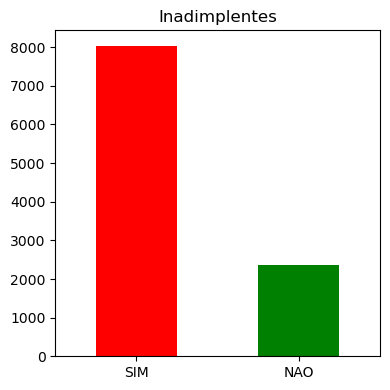

In [181]:
#Target desbalanceado

df_dados['INADIMPLENTE_COBRANCA'].value_counts().plot(kind='bar', title= 'Inadimplentes', color=['#FF0000', '#008000'],
                                                     figsize= [4,4])
plt.xticks(rotation=0);

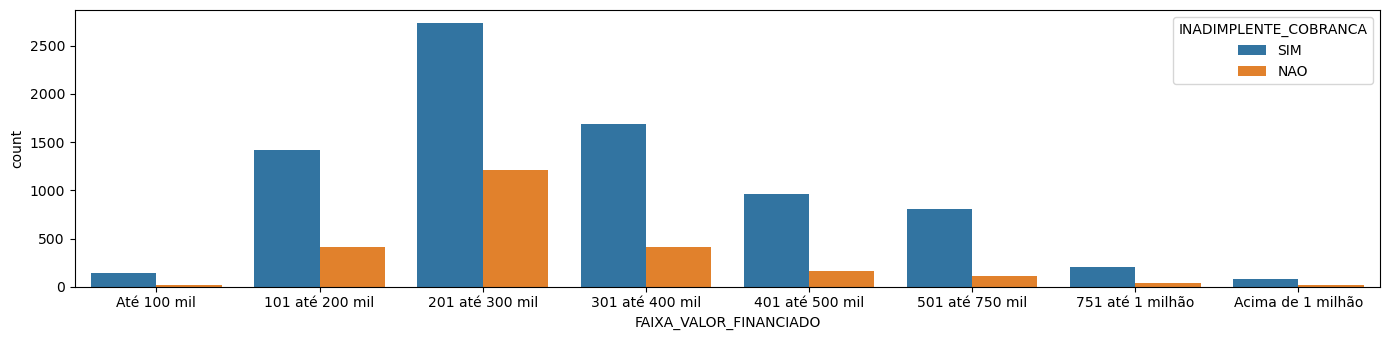

In [182]:
plt.rcParams['figure.figsize'] = [14.00, 3.50]
plt.rcParams['figure.autolayout'] = True
sns.countplot(data = df_dados, x = 'FAIXA_VALOR_FINANCIADO', hue = 'INADIMPLENTE_COBRANCA')
plt.show()

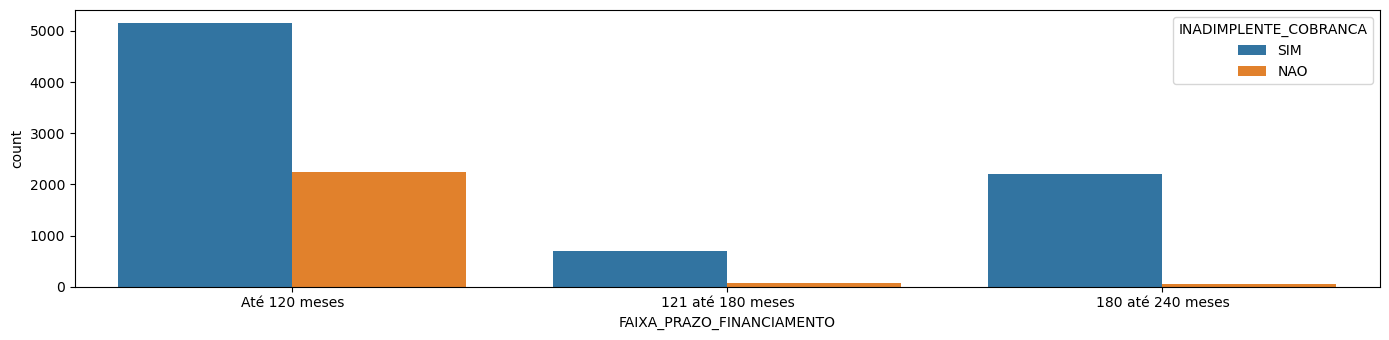

In [183]:
plt.rcParams['figure.figsize'] = [14.00, 3.50]
plt.rcParams['figure.autolayout'] = True
sns.countplot(data = df_dados, x = 'FAIXA_PRAZO_FINANCIAMENTO', hue = 'INADIMPLENTE_COBRANCA')
plt.show()

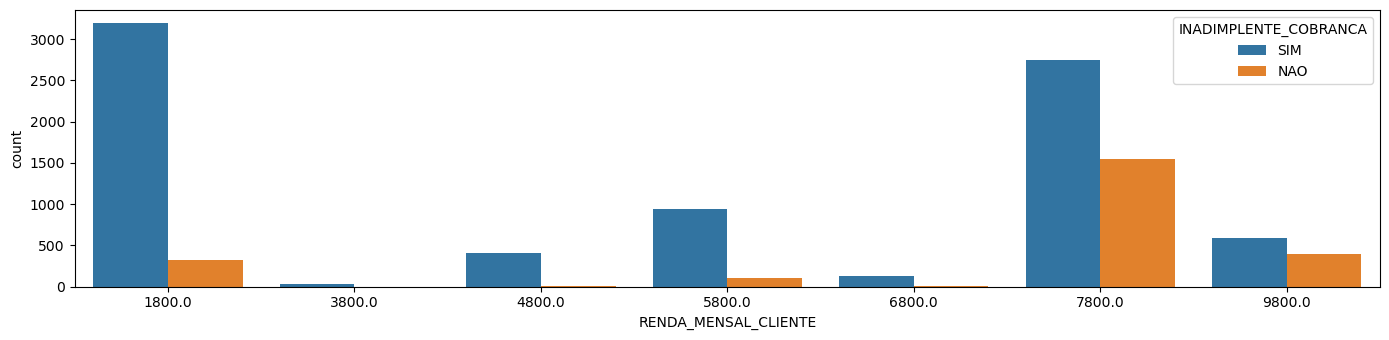

In [184]:
plt.rcParams['figure.figsize'] = [14.00, 3.50]
plt.rcParams['figure.autolayout'] = True
sns.countplot(data = df_dados, x = 'RENDA_MENSAL_CLIENTE', hue = 'INADIMPLENTE_COBRANCA')
plt.show()

In [185]:
#Separando colunas que contém tipos 'int' e 'float'
#Para posteriormente analisar em boxplot

variaveis_numericas = []
for i in df_dados.columns[0:17].tolist():
    if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
        variaveis_numericas.append(i)

In [186]:
variaveis_numericas

['TAXA_AO_ANO',
 'RENDA_MENSAL_CLIENTE',
 'QT_PC_ATRASO',
 'QT_DIAS_PRIM_PC_ATRASO',
 'QT_TOTAL_PC_PAGAS',
 'VL_TOTAL_PC_PAGAS',
 'QT_PC_PAGA_EM_DIA',
 'QT_DIAS_MIN_ATRASO',
 'QT_DIAS_MAX_ATRASO',
 'QT_DIAS_MEDIA_ATRASO',
 'VALOR_PARCELA',
 'IDADE_DATA_ASSINATURA_CONTRATO']

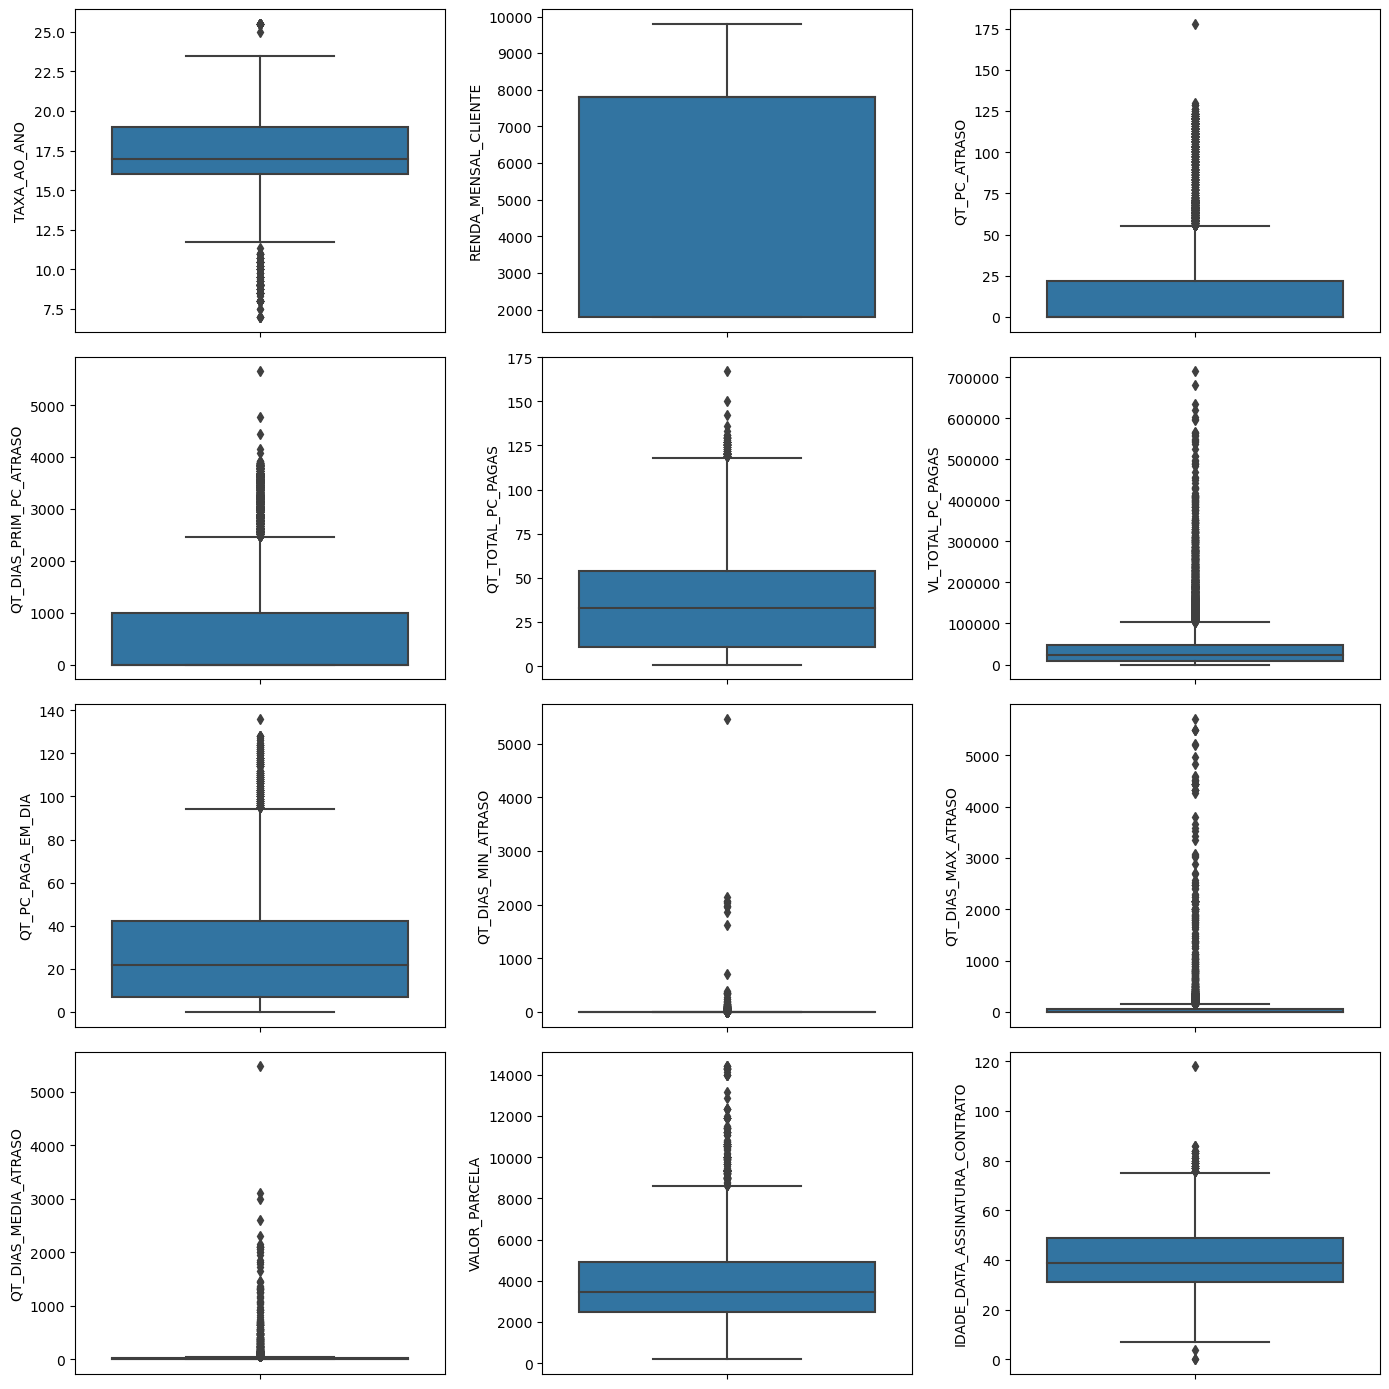

In [187]:
plt.rcParams['figure.figsize'] = [14.00, 14.00]
plt.rcParams['figure.autolayout'] = True
f , axes = plt.subplots(4,3)

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0
        
plt.show()

*Separando dados para treino e teste (Caracteristicas / Targer)*
---

In [188]:
# Bibliotecas para a criação e analise do modelo preditivo
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [189]:
# separando colunas com tipos object e category
# Posteriormente farei o OneHotEncoding
variaveis_categoricas = []
for i in df_dados.columns[0:17].tolist():
    if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':
        variaveis_categoricas.append(i)

In [190]:
variaveis_categoricas

['CIDADE_CLIENTE',
 'ESTADO_CLIENTE',
 'FAIXA_PRAZO_FINANCIAMENTO',
 'FAIXA_VALOR_FINANCIADO',
 'INADIMPLENTE_COBRANCA']

In [191]:
# Alogoritimo para fazer OneHotEnconding dos dados categoricos
lb = LabelEncoder()

for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [192]:
lb.fit_transform(df_dados['INADIMPLENTE_COBRANCA'])

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [193]:
df_dados.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_PRAZO_FINANCIAMENTO,FAIXA_VALOR_FINANCIADO,INADIMPLENTE_COBRANCA
0,15.0,152,5,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,0,7,1
1,15.0,453,25,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,1,2,1
2,18.0,453,25,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,1,4,1
3,15.0,453,25,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,1,3,1
4,17.0,453,25,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,1,4,1


In [194]:
df_dados.shape

(10410, 17)

In [195]:
# Separação dos dados para treino e teste
Preditoras = df_dados.iloc[: , 0:15]
Target = df_dados.iloc[: , 16]

In [196]:
Preditoras.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_PRAZO_FINANCIAMENTO
0,15.0,152,5,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,0
1,15.0,453,25,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,1
2,18.0,453,25,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,1
3,15.0,453,25,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,1
4,17.0,453,25,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,1


In [197]:
# Fazendo o balanceamento do Target
seed = 100
balanceamento = SMOTE(random_state = seed)
Preditoras_res, Target_res = balanceamento.fit_resample(Preditoras, Target)

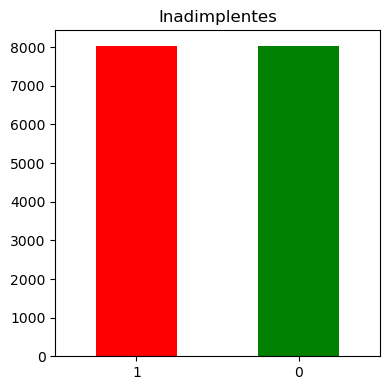

In [198]:
Target_res.value_counts().plot(kind='bar', title= 'Inadimplentes', color=['#FF0000', '#008000'],
                                                     figsize= [4,4])
plt.xticks(rotation=0);

*Treinando modelo preditivo*
----

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import r2_score
import joblib

In [200]:
x_treino, x_teste, y_treino, y_teste = train_test_split(Preditoras_res, Target_res, test_size = 0.3, random_state= 45)

In [201]:
normalizador = MinMaxScaler()
x_treino_normalizados = normalizador.fit_transform(x_treino)
x_teste_normalizados = normalizador.fit_transform(x_teste)

In [202]:
modelo = RandomForestClassifier(n_estimators = 300)
modelo = modelo.fit(x_treino_normalizados, y_treino)

In [203]:
score = modelo.score(x_teste_normalizados, y_teste)
score

0.8726405310101638

In [204]:
previsão = modelo.predict(x_teste_normalizados)

In [205]:
confusion_matrix(y_teste, previsão)

array([[2096,  338],
       [ 276, 2111]], dtype=int64)

In [206]:
print(classification_report(y_teste, previsão))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2434
           1       0.86      0.88      0.87      2387

    accuracy                           0.87      4821
   macro avg       0.87      0.87      0.87      4821
weighted avg       0.87      0.87      0.87      4821



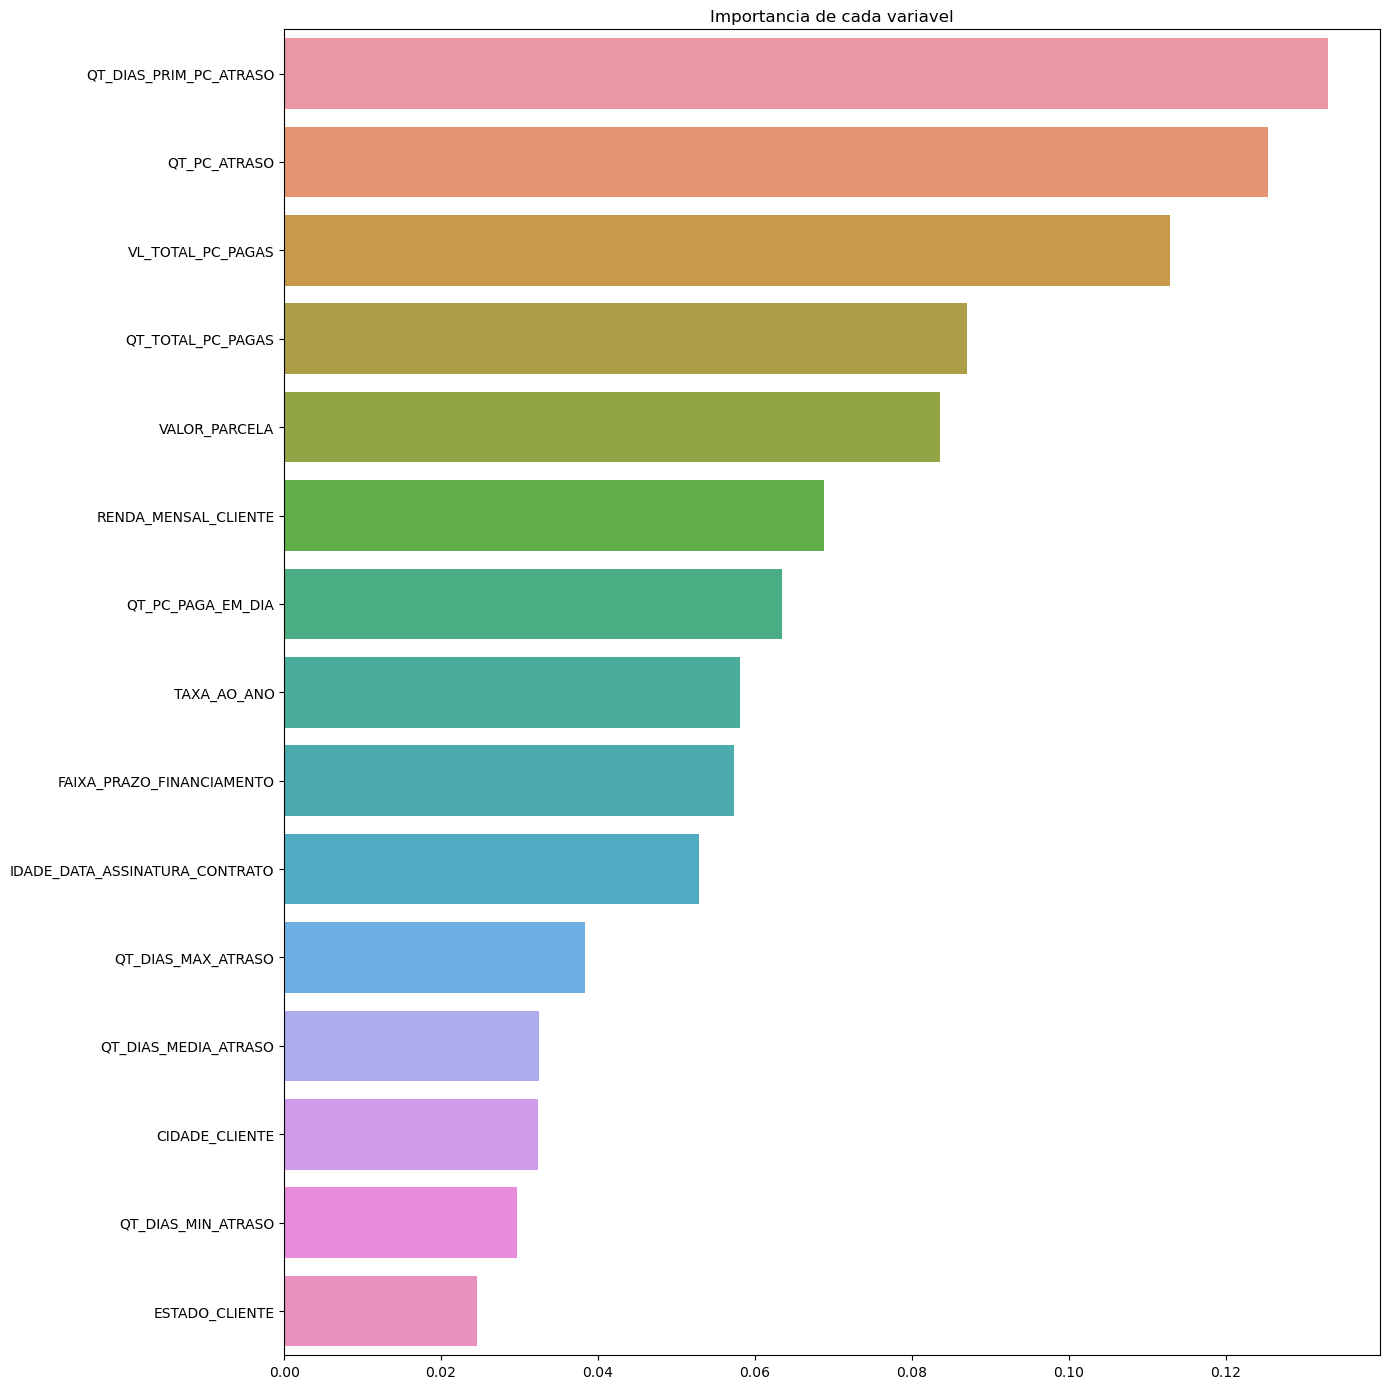

In [207]:
# Variaveis mais importntes do modelo

plt.rcParams['figure.figsize'] = [14.00, 14.00]
plt.rcParams['figure.autolayout'] = True

importances = pd.Series(data=clf.feature_importances_, index=Preditoras.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importancia de cada variavel')
plt.show()

In [ ]:
joblib.dump(clf, 'modelo_treinado.pk')